<a href="https://colab.research.google.com/github/syamkakarla98/DataScience_Head_Start/blob/master/Machine_Learning/Spam_Mail_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spam Mail Classifier**

![alt text](https://miro.medium.com/max/1536/1*mzIPUxnxbzdjlJusLnkNRQ.jpeg)

## Import Libraries

In [124]:
# Handling Data
import pandas as pd
import numpy as np

# Visialization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# For Text processing 
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
# nltk.download('stopwords')

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

#Accuracy Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Change to current working directory
%cd /content/drive/My Drive/DataScience/Data_Science_Head_Start

/content/drive/My Drive/DataScience/Data_Science_Head_Start


## Reading Data

In [0]:
df = pd.read_csv('data/Spam_Mail_Dataset.csv')
# Removing Unnecessary column
df.drop('Unnamed: 0', axis=1, inplace = True)
# Changing column names
df.columns = ['label', 'text', 'class']

In [3]:
df.head()

,label,text,class
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.shape

(5171, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
label    5171 non-null object
text     5171 non-null object
class    5171 non-null int64
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [6]:
# No NaN in the data
df.isna().sum()

label    0
text     0
class    0
dtype: int64

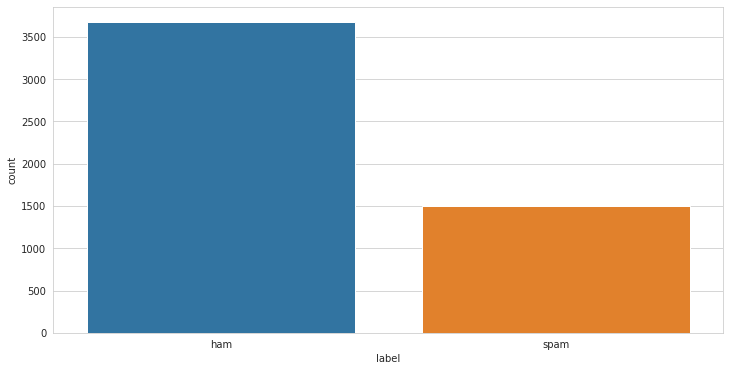

In [7]:
# Barplot describes the count of the class labels
plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = 'label');

## Remove stopwords from the data

In [8]:
%%time
stop_words = set(stopwords.words('english')) 

df['text'] = df['text'].apply(lambda x: ' '.join([ word for word in word_tokenize(x)  if not word in stop_words]))

CPU times: user 6.97 s, sys: 22.9 ms, total: 6.99 s
Wall time: 7.01 s


In [9]:
df.sample(10)

,label,text,class
4313,ham,Subject : fw : tenaska iv meeting list . xls f...,0
2448,ham,Subject : tenaska iv - - cleburne march 2001 s...,0
5028,ham,"Subject : hpl nom march 29 , 2001 ( see attach...",0
3612,ham,Subject : eastrans nomination change effective...,0
4845,ham,"Subject : cleburne daren & john , see attached...",0
4775,ham,Subject : new email yo bro . new email address...,0
97,ham,"Subject : hpl nom march 27 , 2001 ( see attach...",0
2840,ham,Subject : fyi - lubrizol - april lst changeove...,0
4715,ham,"Subject : hpl nom sept . 20 , 2000 ( see attac...",0
2560,ham,Subject : new carthage phys product eol hey ro...,0


In [10]:
X = df.loc[:, 'text']
y = df.loc[:, 'class']

print(f"Shape of X: {X.shape}\nshape of y: {y.shape}")

Shape of X: (5171,)
shape of y: (5171,)


## Split data into **train** and **test** in 80:20

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [12]:
print(f"Train Data Shape: {X_train.shape}\nTest Data Shape: {X_test.shape}")

Train Data Shape: (4136,)
Test Data Shape: (1035,)


## Preprocess text to build the ML mdel

In [13]:
cVect = CountVectorizer()
cVect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

  Let's see the vocabulary that has extracted by hte count vextorizer

In [14]:
print('NO.of Tokens: ',len(cVect.vocabulary_.keys()))

NO.of Tokens:  44255


In [0]:
# document term vector (dtv)
dtv = cVect.transform(X_train)

In [16]:
type(dtv)

scipy.sparse.csr.csr_matrix

In [0]:
dtv = dtv.toarray()

In [18]:
print(f"Number of Observations: {dtv.shape[0]}\nTokens/Features: {dtv.shape[1]}")

Number of Observations: 4136
Tokens/Features: 44255


In [19]:
# Let's see an sample that has been preprocessed
dtv[1]

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
%%time
lr = LogisticRegression(solver='lbfgs')
lr.fit(dtv, y_train)

CPU times: user 31.4 s, sys: 768 ms, total: 32.2 s
Wall time: 16.8 s


## Evaluate on the Test data

In [21]:
# Preprocess the test data
test_dtv = cVect.transform(X_test)
test_dtv = test_dtv.toarray()
print(f"Number of Observations: {test_dtv.shape[0]}\nTokens/Features: {test_dtv.shape[1]}")

Number of Observations: 1035
Tokens/Features: 44255


In [25]:
%%time
pred = lr.predict(test_dtv)

CPU times: user 135 ms, sys: 2.01 ms, total: 137 ms
Wall time: 116 ms


In [28]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  98.45410628019323


  Classification Report of the classifier

In [30]:
# 0 - Not Spam / Ham
# 1 - Spam 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       744
           1       0.95      0.99      0.97       291

    accuracy                           0.98      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.99      0.98      0.98      1035



  Confusion Matrix

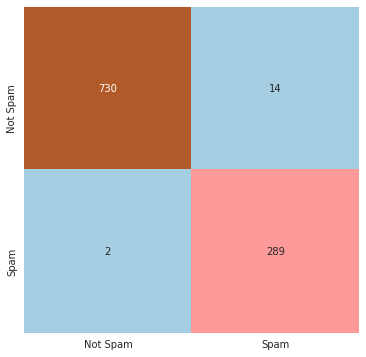

In [82]:
cmat = confusion_matrix(y_test, pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

## Predict Class label for the unseen data i.e., Spam or Not Spam

In [0]:
def predict_class(lr):
  text = input('Enter Text(Subject of the mail): ')
  text = [' '.join([ word for word in word_tokenize(text)  if not word in stop_words])]
  t_dtv = cVect.transform(text).toarray()
  print('Predicted Class:', end = ' ')
  print('Spam' if lr.predict(t_dtv)[0] else 'Not Spam') 
  prob = lr.predict_proba(t_dtv)*100
  print(f"Not Spam: {prob[0][0]}%\nSpam: {prob[0][1]}%")


In [120]:
predict_class(lr)

Enter Text(Subject of the mail): 'You won 1000$ prize money in lottery. Click here to avail'
Predicted Class: Spam
Not Spam: 4.453477590482279%
Spam: 95.54652240951772%




---

